In [25]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
np.float_ = np.float64
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import os
os.chdir("/Users/alexanderschou/Desktop/Projects/adv_mla_2024/AT2_experimentation/data/processed")

In [6]:
sales_train_processed = pd.read_csv('sales_train_processed.csv')

/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_85084/3300575340.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_processed = pd.read_csv('sales_train_processed.csv')


In [8]:
sales_test = pd.read_csv('sales_test.csv')

In [9]:
sales_train_processed.dtypes

item_id        object
dept_id        object
cat_id         object
store_id       object
state_id       object
sales           int64
date           object
year            int64
week            int64
event_name     object
event_type     object
sell_price    float64
revenue       float64
dtype: object

In [10]:
sales_train_processed['date'] = pd.to_datetime(sales_train_processed['date'])

In [11]:
daily_sales = sales_train_processed.groupby('date')['revenue'].sum().reset_index()

In [12]:
daily_sales.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)

In [14]:
train = daily_sales[daily_sales['ds'] < '2015-01-01']
test = daily_sales[daily_sales['ds'] >= '2015-01-01']

In [16]:
forecasting_model = Prophet()
forecasting_model.fit(train)

22:10:21 - cmdstanpy - INFO - Chain [1] start processing
22:10:24 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = forecasting_model.make_future_dataframe(periods=len(test))

In [19]:
forecast = forecasting_model.predict(future)

In [21]:
forecast_test = forecast[forecast['ds'].isin(test['ds'])][['ds', 'yhat']]

/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


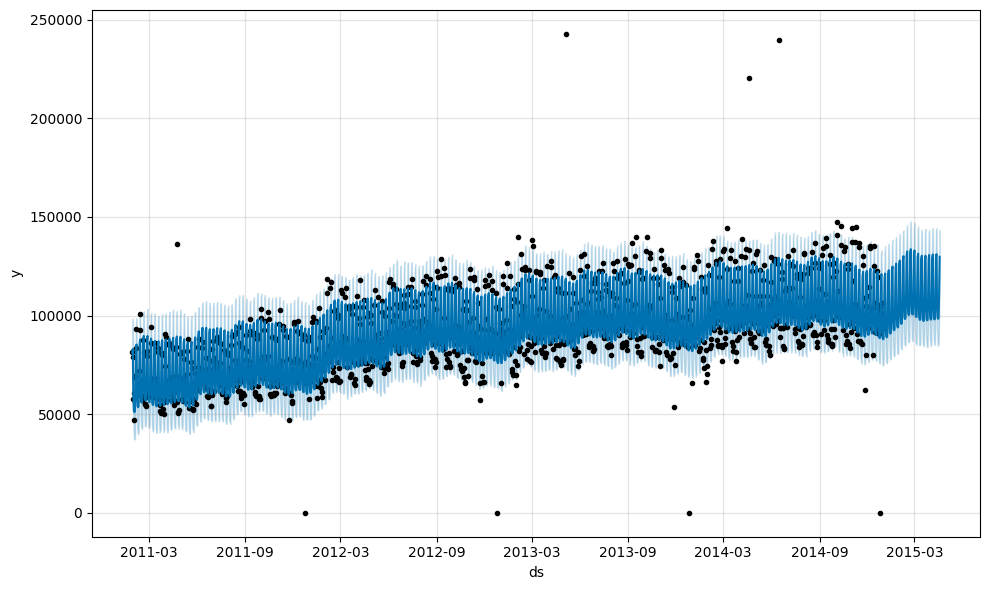

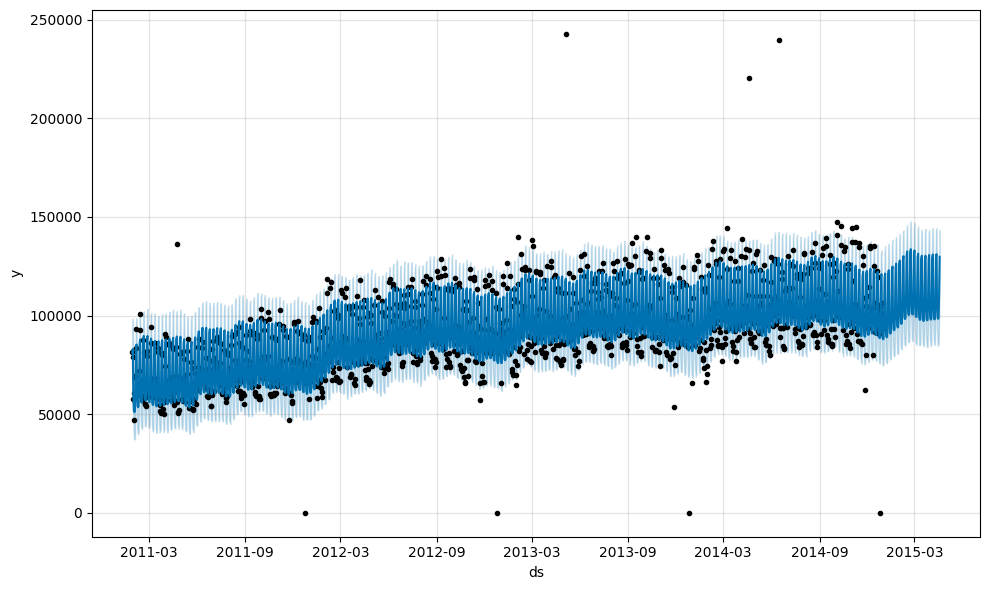

In [22]:
forecasting_model.plot(forecast)

In [28]:
evaluation_df = pd.merge(test, forecast_test, left_on='ds', right_on='ds')
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 7960.552699399264


/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/

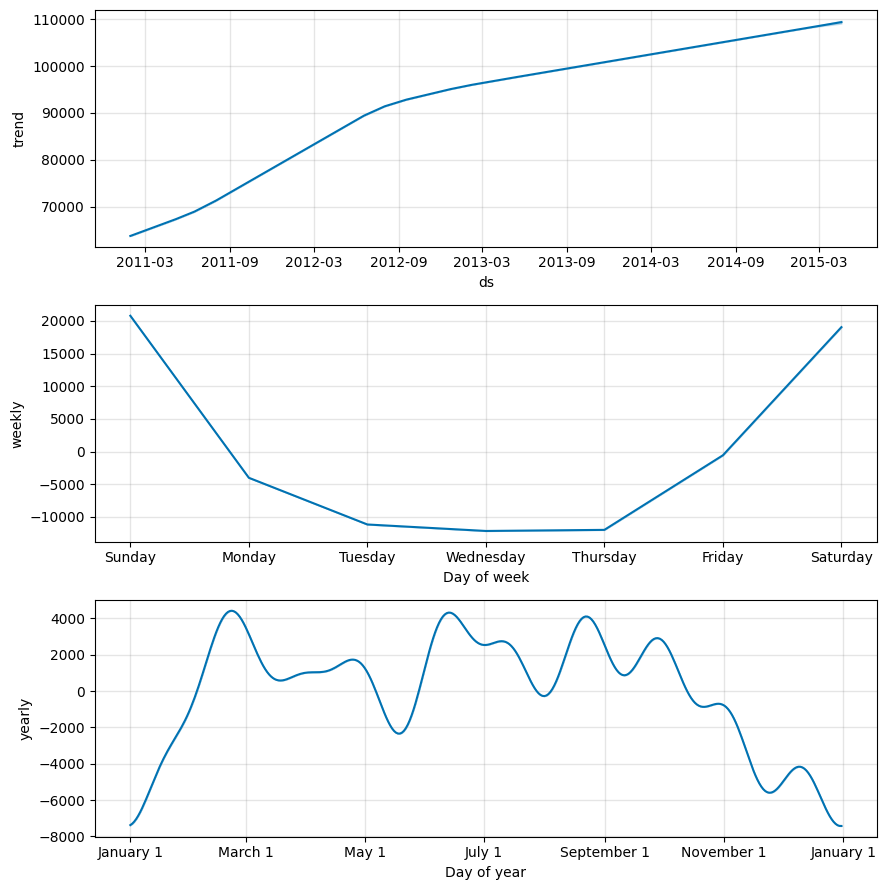

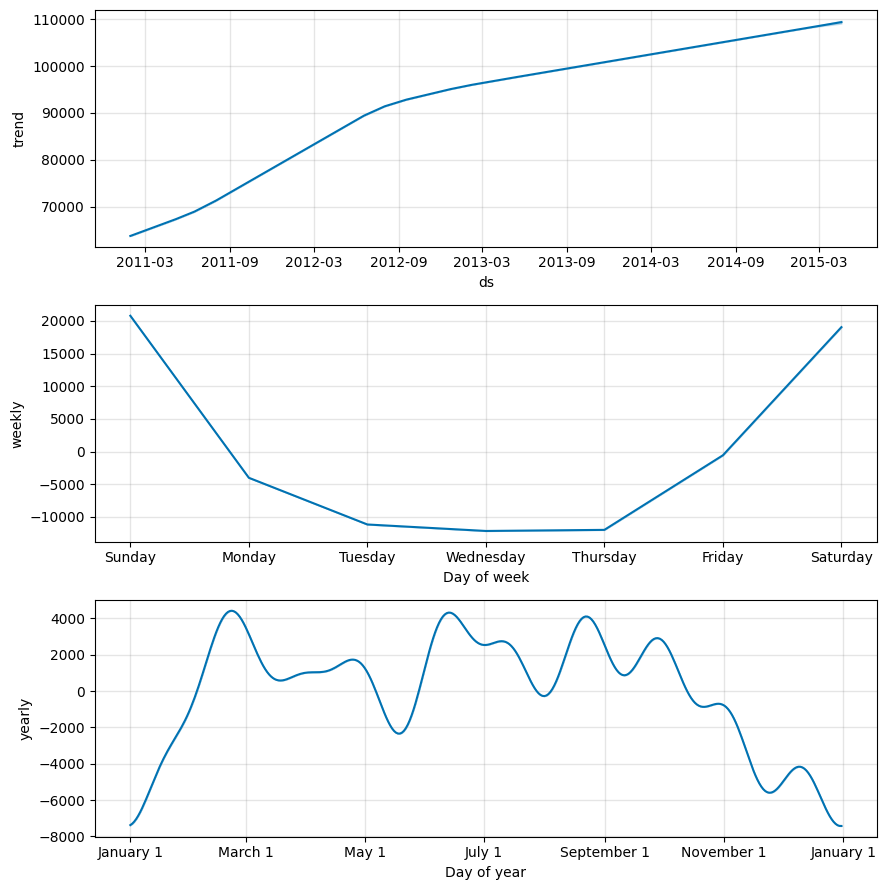

In [29]:
forecasting_model.plot_components(forecast)

In [30]:
forecasting_model_full = Prophet()
forecasting_model_full.fit(daily_sales)

22:14:34 - cmdstanpy - INFO - Chain [1] start processing
22:14:34 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast_full = forecasting_model_full.predict(sales_test)

In [ ]:
forecasting_model_full.plot(forecast_full)

In [ ]:
os.chdir("/Users/alexanderschou/Desktop/Projects/adv_mla_2024/AT2_experimentation/models/forecasting")
joblib.dump(forecasting_model_full, 'prophet_sales_model.pkl')

In [1]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import joblib
import os

/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
os.chdir("/Users/alexanderschou/Desktop/Projects/adv_mla_2024/AT2_experimentation/data/processed")

sales_train_processed = pd.read_csv('sales_train_processed.csv')
sales_test_processed = pd.read_csv('sales_test_processed.csv')

/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_90064/1636837318.py:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_processed = pd.read_csv('sales_train_processed.csv')
/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_90064/1636837318.py:4: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_test_processed = pd.read_csv('sales_test_processed.csv')


In [3]:
sales_train_processed['date'] = pd.to_datetime(sales_train_processed['date'])
sales_test_processed['date'] = pd.to_datetime(sales_test_processed['date'])

In [5]:
daily_sales_train = sales_train_processed.groupby('date')['revenue'].sum().reset_index()
daily_sales_train.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)

daily_sales_test = sales_test_processed.groupby('date')['revenue'].sum().reset_index()
daily_sales_test.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)

In [6]:
forecasting_model = Prophet()
forecasting_model.fit(daily_sales_train)

22:11:02 - cmdstanpy - INFO - Chain [1] start processing
22:11:03 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future_test = forecasting_model.make_future_dataframe(periods=len(daily_sales_test), include_history=False)
forecast_test = forecasting_model.predict(future_test)

In [8]:
forecast_test_filtered = forecast_test[['ds', 'yhat']].head(len(daily_sales_test))  # Ensure same size
evaluation_df = pd.merge(daily_sales_test, forecast_test_filtered, on='ds')

In [9]:
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
print(f"Mean Absolute Error (MAE) on test set: {mae}")

Mean Absolute Error (MAE) on test set: 10201.263600393197


/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


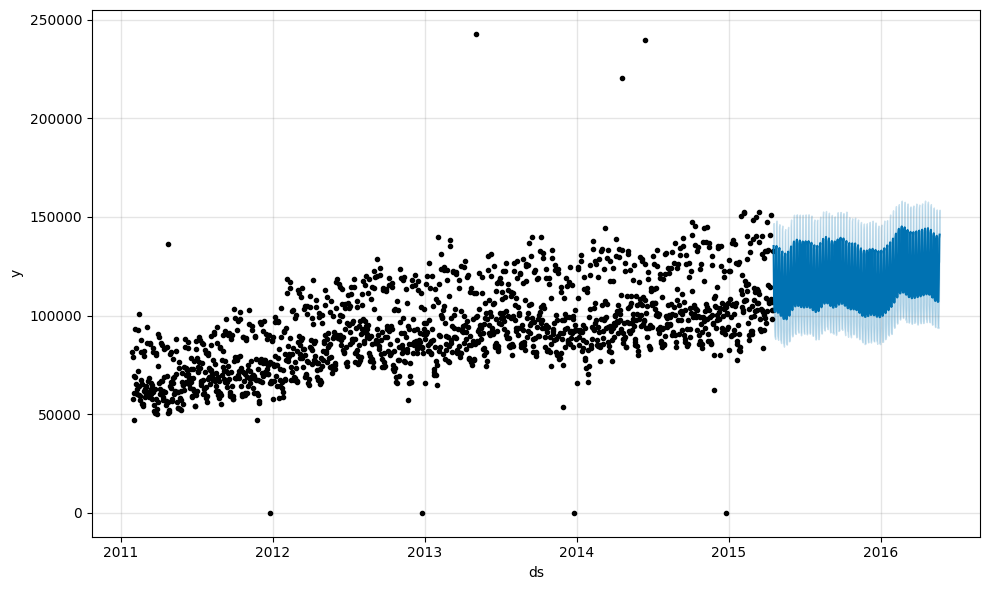

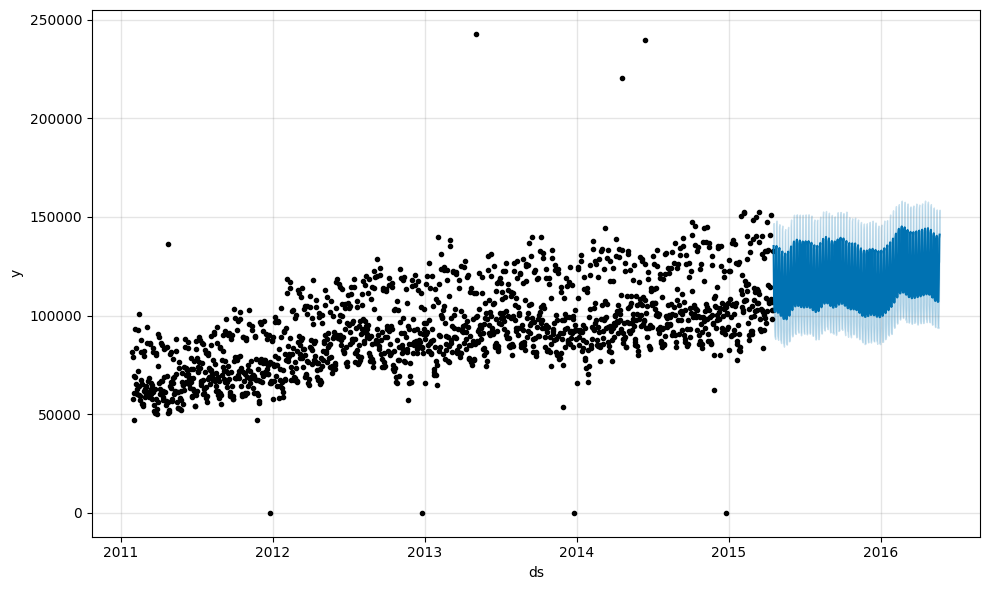

In [10]:
forecasting_model.plot(forecast_test)

In [12]:
full_sales_data = pd.concat([sales_train_processed, sales_test_processed], ignore_index=True)
daily_sales_full = full_sales_data.groupby('date')['revenue'].sum().reset_index()
daily_sales_full.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)

In [13]:
forecasting_model_full = Prophet()
forecasting_model_full.fit(daily_sales_full)

22:12:29 - cmdstanpy - INFO - Chain [1] start processing
22:12:30 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future_full = forecasting_model_full.make_future_dataframe(periods=7, include_history=False)
forecast_next_7_days = forecasting_model_full.predict(future_full)

In [15]:
print(forecast_next_7_days[['ds', 'yhat']])

          ds           yhat
0 2016-05-23  129359.446455
1 2016-05-24  121592.786250
2 2016-05-25  120715.575525
3 2016-05-26  121277.664496
4 2016-05-27  132837.938477
5 2016-05-28  154751.799504
6 2016-05-29  157073.223057


In [16]:
os.chdir("/Users/alexanderschou/Desktop/Projects/adv_mla_2024/AT2_experimentation/models/forecasting")
joblib.dump(forecasting_model_full, 'prophet_sales_model_full.pkl')

['prophet_sales_model_full.pkl']

/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/alexanderschou/Library/Caches/pypoetry/virtualenvs/at2-experimentation-YINVk6u--py3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


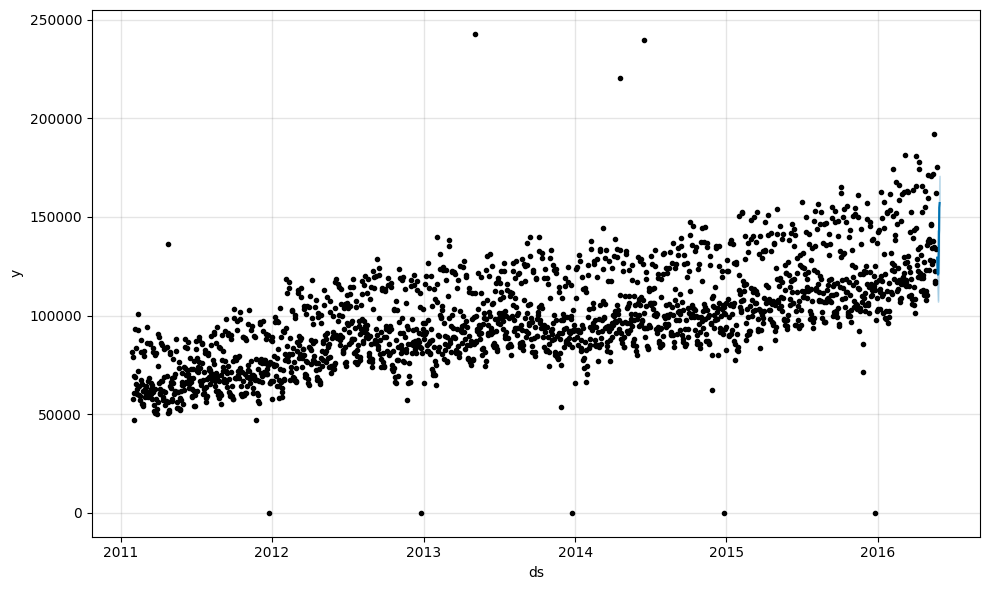

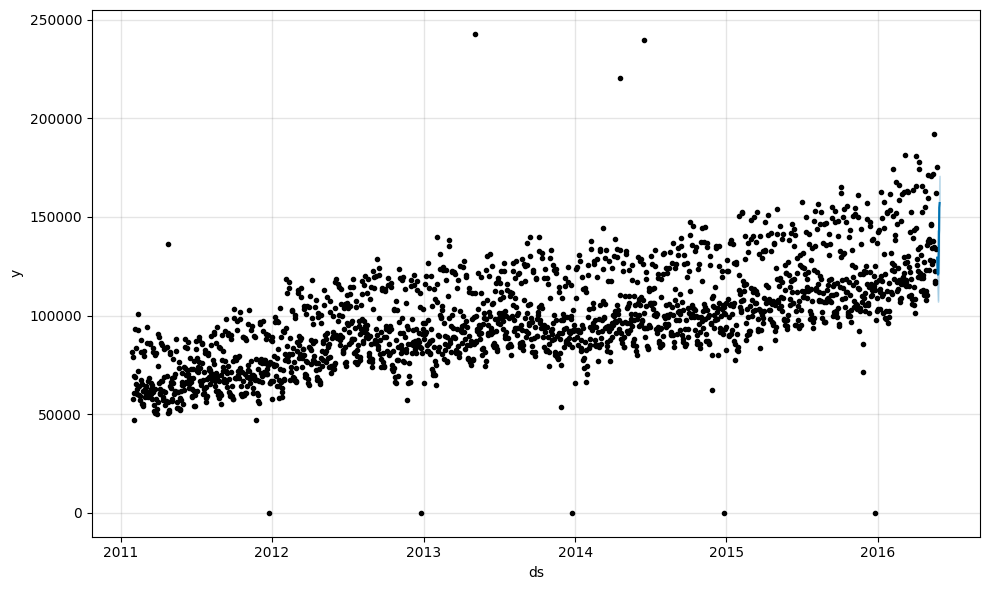

In [17]:
forecasting_model_full.plot(forecast_next_7_days)